## The simgle cell theory

### The sliding threshold idea

Cooper, liberman and Oja (1979) introduced the idea that there may be a modification threshold enforced on post-synaptic output for synaptic plasticity rules. When presynaptic input triggers the firing activity of post-synaptic neuron that is bigger than the threshold, the change of synaptic weights followes classical hebbian rules. However, when the post synaptic activity triggered by the inputs is smaller than the threshold, the synaptic strength will be weakened (the non-hebbian zone).

Based on this hypothesis, Bienenstock, Cooper and Munro brought up the idea that the modification threshold might be a function of post-synaptic neuronal output(activity for example). The theory might be stable given that it is non-linear and the threshold will catch up fast enough on the cell output and prevent the reverberating change of the synaptic strengh.

### Definition and notation

Here, we use a single neuron model which receive inputs from left and right eye respectively without cross talk.
The output firing activity of the simplified neuron $c$ could be written as the combination of the firing activity of left ($d^l$) and right ($d^r$) inputs with their weigths $m^l,m^r$ $c = m^ld ^l+m^rd^r = \sum_i m^l_id^l_i + \sum_j m^r_jd^r_j $

We could assume $i\equiv j$, and use $m^l$ and $m^r$ to regulate the number of synaptic inputs from left and right independently.Therefore, the output single neuron activity is

$c = m^ld ^l+m^rd^r = \sum_j m^l_jd^l_j + \sum_j m^r_jd^r_j $


According to the rate-based plasticity model, the synaptic plasticity rule could be written as a function on the input to neuron j and the original weight ($d_j$,$w_j$), the other inputs and weights ($d_k,w_k$),the output of the post synaptic neuron $c$ and its history $\overline c$, as well as other factors X,Y,Z

$\dot{m_j} = F(d_j,m_j;d_k...m_k;c;\overline{c};X,Y,Z)$

The important characteristics of the parameters are if they are local (only to the updated weights), or quasi-local, which indicates that they are indirectly related to the weights in study. And $\overline{c}$ represents the time-averaged post-synaptic activity.

So what is the time scale of $d,m$ and $c$? Variation of input activity that is too short failed to produce plasticity effect, while inputs average over a long time window, e.g. 1 sec, may lose useful information. Therefore, the authors denote that $d$ is obtained through averaging presynaptic activity over a time period that preserves the information needed for synaptic modification within the primary visual cortex.Similar timing scale requirement is applied on synaptic weight $w$. This time scale is applied for each epoch of updateing $w$, which means the synaptic weights do not necessarily need to be changed to its final stage, but the key information is still preserved given the time resolution. Similarly, the time period over which $c$ is average is likely to be some part of a second.

It is not clear whether c represents the average firing activity of post-synaptic neuron, the integrated post-synaptic depolarization or even the $Ca^{2+}$ concentration. However,as the detailed timing information of $c$ is not key to the updating rule, we could generally assume that the above equation captures the rate-dependent learnin rule.And as the author said, as long as the variable $c$ is a continuous, possibly non-linear function of the sum of inputs times the synaptic efficacies of the relevant inputs), the model is general enough to fit any reasonable definition of the inputs.

One of the key factor we need to consider is the relative relationship betweent the time interval of $d,m,c$ with respect to threshold $\theta_m$. Given the setting up of the characteristic time of $d,m,c$ to be around ms to sec, the characteristic time of $\theta_m$ is on the order of minutes to houts.Therefore, the physhiological mechanism underlying the updating rule of $\theta_m$ is possibily different from the one that updates $m$

### BCM synaptic modification

BCM synaptic modification rule for active synapses is characterized by a negative (depression) region for small value of $c$ and a positive region for large value of c with a sliding threshold $\theta_m$, which moves as a function of $\overline{c}$ and stablize the system.

$m_j' = \eta \Phi(c,\overline{c},X,Y,Z)d_j $

If we neglect the globle variable, we will obtain 
$m'^{l(r)} = \eta \Phi(c,\overline{c})d^{l(r)}$

What is of particular importance is the change of sign of $\phi$ at the modification threhsold $\theta_m$ and the nonlinear variation of $\theta_m$ as a function of $\overline{c}$

In the form originally proposed by BCM, $\theta_m = \overline {c}^2$

And the average range of output is integrated over an exponential time window.
Given $\overline {c} = \frac{1}{\tau}\int_{-\infty}^t{c(t')e^{-\frac{t-t'}{\tau}}dt'}$,

$\theta_m = \frac{1}{\tau}\int_{-\infty}^t{c^2(t')e^{-\frac{t-t'}{\tau}}dt'}$, which is the squared activity integrated over an exponential time window

Now let's simulate the above function.To see the relationship between activity c and $\Phi$, $\theta_m respectively$

### One dimensional analysis (Single input)

Here, we will discuss the case in which there is only on activity input, the function $\Phi$ take a parabolic format and the learning rate $\eta$ is set to 1. Therefore, the learning rule could be written as

$m' = c(c-\theta_m)d$

#### 1. Fixed threshold

In the case of non-sliding threshold, which means $\theta_m = \theta_0$ with $\theta_0$ being a constant, we could get function $\Phi_m = c(c-\theta_0)$

Populating the interactive namespace from numpy and matplotlib


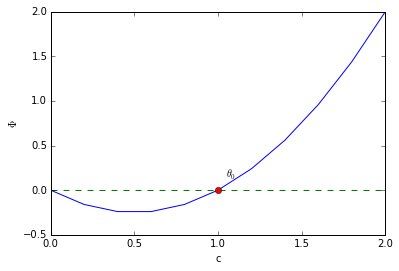

In [2]:
%pylab inline 
## populate the interactive namespace for numpy and matplotlib% matplotlib inline

import matplotlib.pyplot as plt

a = np.linspace(0,2,11)
zero_x = np.linspace(min(a),max(a),len(a))
zero_y = zero_x*0;

b = a*(a-1)
plt.plot(a,b)
plt.plot(zero_x,zero_y,'--')
plt.ylabel('$\Phi$')
plt.xlabel('c')

annotate(r'$\theta_0$', xy=(2, 2), xytext=(1.05, 0.15))
plot(1, 0, 'ro')

As could be seen from the illustrative plot, when $c \in [0,\theta_0]$, $\Phi <0$, weight will decrease until output $c = 0$. Alternatively, when $c \in [\theta_0,\infty]$, weight and output will increase to infinity.Therefore, when threshold is a constant, the system is unstable or trivial stable at point $c = 0$.

#### 2. Instantaneously sliding threshold

From the discussion above, we could see that the choice of $\theta_m$ for the initial BCM theory is the squared exponential moving average of the output c ($\overline{c}^2$). But before reaching the final case, we could first discuss the case where a stable non-zero fixed point could be reached. And here, we will use f(c(t)) as the threshold. Given that $c(t)$ could be evaluated instantaneouly, we call it instantaneosly sliding threshold.

Still adopting the parabolic format of function $\Phi$, we could have
$\Phi = c(c-c^2)$

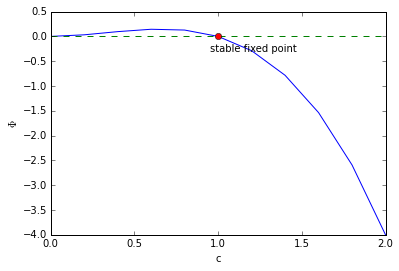

In [27]:
a = np.linspace(0,2,11)
zero_x = np.linspace(min(a),max(a),len(a))
zero_y = zero_x*0;

b = a*(a-a**2)
plt.plot(a,b)
plt.plot(zero_x,zero_y,'--')
plt.ylabel('$\Phi$')
plt.xlabel('c')

annotate('stable fixed point', xy=(1, 0), xytext=(0.95, -0.3))
plot(1, 0, 'ro')

From the above plot we could see that the point $c = 1 $ is a stable selective fixed point. Therefore, the sliding threshold provides stability of the system and the plasticity of the weights is to maintain a stable output c. The output c below 1 will lead to potentiation of the weight and output above 1 will lead to depression of the weight.

#### 3. Instantaneous sliding threshold with a probabilistic input

The above senario discuss the case where $d$ is a deterministic input. What will happen if $d$ becomes probabilistic, i.e., d is presented to the neuron only during some time and zeros otherwise.

If we still define $\theta_m$ as a function over the instantaneous value of $c$. Then we will have $\theta_m = f(pc)$, where $p$ is the probabiltiy of the input coming at each time point.

1. When there is no input at time t, $\theta_m = 0$, $m' = c(c-\theta_m)d = 0 $. Therefore, there will be no change on weights but change on threshold.

2. When there is input and the threshold is defined to be the square of the current output, the case will be similar as the non-probabilistic case shown above.

3. If the threshold is the average over the square of output, then given that d appears with the probabiltiy $p$ and 0 input with a probabiltiy $1-p$, the threshold $\theta_m = pc^2$. The learning rule then becomes

$m' = c[c-pc^2]d=c^2(1-pc)d$

Therefore, the eventual stable fixed point of output will $c = \frac{1}{p}$.That is to say, in a single input case, the more frequent the input the lower the final activity of the neuron that the input could drive.

#### Summary

1. When threshold $\theta_m$ is a constant, the systerm is unstable, or trivially stable at $c = 0$.
2. When threshold $\theta_m$ becomes a function of output, i.e., sliding, it provides stability to the system.
3. The weights change to keep the output constant
4. Given that in probabilistic input, the final stablized $c = 1/p$ with p as the probability of the appearance of the input, we could conclude that the less frequent input will lead to stronger potentiation of the weights, and the eventual fixed point of output activity is bigger.

### The nonlinear sliding threshold

BCM's original theory chose $\theta_m = (\overline{c})^p$, where $\overline{c}$ is the average over the input enviornment and get updated instantaneously after each input pattern. However, this leads to fluctuating thresholds and is impossible for the physiological system.Therefore we use the temporal average to approximate the ($\overline{c})$. And given the stability discussion in single input case and considering the complexity, p was chosen to be 2 for the following discussion. To prevent the average value being zero, we calculate the square before calculting the mean and therefore could get:

$\theta_m = \overline{(c^2)} = \frac{1}{\tau}\int_{-\infty}^t c^2(t') {exp}^{\frac{t'-t}{\tau}}dt'$

Other different formats of threhsold $\theta_m$ will be discussed in objective function formulation session.

The speed of updating for $\theta_m$ and if it could follows up the change of $c$ is an important question for discussion.We won't look into it here. To prevent oscillation and make sure that threshold will eventually catch up with c, there's a constraint that $\eta\tau d^2<1$

Given that $\theta_m$ is a function of output and is dependent on the input pattern,d,it will be quite different for different input environment. This will become usefule when we apply the BCM theory to explain experimental findings on monocular/binocular deprivation.

### Analysis of two dimensional neuron

#### According to BCM, the updating rule $m^l(r)_j' = \eta \Phi(c,\theta_m)d^l(r)_j$ leads to a temporal competition among patterns, instead of spatial competition of inputs.

The rational behind is that single input will leads to activity of inputs, but won't elicit high enough inputs unless cooperate with other inputs to form up a pattern. Therefore, only selected pattern by the neuron will lead to LTP, while unselected activity will lead to LTD. No input activity will lead to no change.

The nolinear variation of threshold $\theta_m$ with the average output of the cell contributes to the development of selectivity and stability of the system.


To illustrate the above properties qualitatively, the authors analyze the behavior of a single neuron with two synaptic
inputs ($d_1$ and $d_2$) in various environments. Applying the limit that $\tau \rightarrow 0$, 

#### Two inputs environment (coming through a single eye to the single neuron)

Considering an environment consisting of two non-parallel input vectors $d^1$ and $d^2$(vector in time space) with probability $p_1$ and $p_2$ respectively (post synaptic neuron is driven only by one input pattern at a certain time).The determinstic differential equation therefore will become

$m' = \eta [ p_1 \Phi(c(d^1),\theta_m)d_1+p_2 \Phi(c(d^2), \theta_m)d_2]$

If we take the parabolic format of $\Phi$, we will obtain:
$m' = \eta [ p_1 (c(d_1)(c(d_1)-\theta_m))d_1+p_2(c(d_2)(c(d_2)-\theta_m)d_2]$

Find the number of fixed points of this equation.

Case 1: $\Phi (c(d_1)) = \Phi (c(d_2)) = 0$. There will be four stable fixed points: $c(d_i) = 0$, or $c(d_i) = \theta_m$.

1> $m_1$ such that $c(d_1)=0 \space and \space c(d_2) = \theta^1_m$

2> $m_2$ such that $c(d_1)=\theta^2_m \space and \space c(d_2)=0 $

3> $m_3$ such that $c(d_1)=0 \space and \space c(d_2) = 0$

4> $m_4$ such that $c(d_1)=\theta^4_m \space and \space c(d_2) = \theta^4_m$


 
Case 2: $p_1 \Phi(c(d^1),\theta_m)d_1= - p_2 \Phi(c(d^2), \theta_m)d_2$


From case 1 we could see that we may get two selective fixed point $m_1$ or $m_2$, while the fixed points $m_3$ and $m_4$ are unselective fixed points. It could be shown that selective fixe points are stable (pertubation will decay to zero eventually) and the nonselective fixed points are unstable. Given that $d_1$ and $d_2$ are input patterns respectively, we could refer the pattern that give rise to the selective fixed point of $m$ as the prefered stimulus pattern, the other one that elicit $m = 0$ is therefore a non-prefered stimulus.

As shown above, given the pattern that the neuron is selective to, the final activity triggers but the pattern will be inverse to the probability of the input, and the final weight will be perpendicular to the non-selective inputs. This is different from Oja's rule, where the stablized weight will be the first principle components of the covariance matrix of the inputs.And the product therefore will give the biggest output activity.In BCM, however, the maximum activity will be scaled so that the output will be proportional to the inverse of the probability of inputs. Therefore, the receptive field obtained by BCM will signal both the feature it selective to, and an estimation of the probabiltiy of the inputs.

### Experimental conditions

#### Normal rearing

Let's include the input pattern received by both left and right eye and consider the binocular zone.

$d = \{d^l,d^r\}$, where, $d^l = \{d^l_1,d^l_2,...,d^l_k\}$ and $d^r = \{d^r_1,d^r_2,...,d^r_k\}$


Therefore, the activity of the post-synaptic neuron will become
$m\cdot d_i = m^l\cdot d^l_i + m^r\cdot d^r_i   $

In the case of k input patterns, we will have 
$m\cdot d = p_1\Phi(m^l\cdot d^l_1+m^r\cdot d^r_1 ,\theta_m)d_1+p_2\Phi(m^l\cdot d^l_2+m^r\cdot d^r_2 ,\theta_m)d_2$
$+...+p_k\Phi(m^l\cdot d^l_k+m^r\cdot d^r_k,\theta_m)d_k$

If left and right eye see exactly the same pattern, that is $d^l_i = d^r_i = d_i$, we could update the above equation as 

$m\cdot d = p_1\Phi((m^l+m^r)\cdot d_1,\theta_m)d_1+p_2\Phi((m^l+m^r)\cdot d_2,\theta_m)d_2+...+p_k\Phi((m^l+m^r)\cdot d_k,\theta_m)d_k$

According to the stability of fixed points in two input pattern case, we could see that only the selective input pattern will be stable. Therefore,if we assume that if input pattern $d_1$ is what the neuron selective towards, we will have:

$m\cdot d_i = \left \{\begin{array}
+\theta_m, for \space i = 1\\
0, for \space i >1
\end{array}
\right.$

#### Monocular deprivation

In the case of monocular deprivation (let's say the right eye), then the input signal change from $\{d^l,d^r\}$ to $\{d^l,n\}$. If before deprivation, the receptive has been formed to the fixed point $\theta_m$. Then how will the deprivation change selectivity?

If we denote the synapse receiving inputs from the closed eye $m = x$, then according to the definition of $\dot {m}= \eta\Phi d$, we could expand the $\Phi$ close to the fixed points $0, \theta_m$

$\Phi \approx -\epsilon_2c$ when c is near zero and $\Phi \approx \epsilon_1(c-\theta_m)$ when c is close to $\theta_m$

Therefore, the total output will be $c = m^l\cdot d^l_i+x\cdot n$

The output to the open eye stimulus will be 
$m\cdot d_i = \left \{\begin{array}
+\theta_m +x\cdot n,\space for \space i = 1\\
x\cdot n, \space for \space i >1
\end{array}
\right.$

The change of weights from the closed eye will then become, 
$\dot x = \left \{\begin{array}
+\epsilon_1(\theta_m +x\cdot n-\theta_m)n\approx \epsilon_1 \overline{n^2},\space for \space i = 1\\
-\epsilon_2(x\cdot n)n\approx -\epsilon_2 \overline{n^2}, \space for \space i >1
\end{array}
\right.$

For neurons with dimensionality $>2$, most of the patterns will elicit $c = 0$. Therefore, $\dot x \approx -\epsilon_2 \overline {n^2}<0 $ and the weights for the deprived inputs will eventually be $c \approx 0$

The change of weights from the open eye will then become, 
$\dot m^l = \left \{\begin{array}
+\epsilon_1(\theta_m +x\cdot n-\theta_m)d_l\approx \epsilon_1\cdot x\cdot n\cdot d,\space for \space i = 1\\
-\epsilon_2(x\cdot n)d_l\approx -\epsilon_2 \cdot x \cdot n\cdot d, \space for \space i >1
\end{array}
\right.$



If we rewrite the weight change of the deprived and open eye

### $\dot x \approx (p_1\epsilon_1 - \epsilon_2\sum^N_{i=2} p_i)\overline{n^2}x$

### $\dot m^l \approx (p_1\epsilon_1 d_1 - \epsilon_2\sum^N_{i=2} p_id_i)x\cdot n$
From the above weights updating rule in the deprived eye, we can see that the larger the noise, the stronger and faster the deprivation. It explained when we use two ways of monocular deprivation: eye suture and dark rearing. The further, which has strong noise inputs,led to faster monucular deprivation.

Also, we can see that the rate of deprivation is the relative frequency of the stimulus comparing with the general environment stimulus.